In [576]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [641]:
class WrightFisher():
    """
    Haploid Wright-Fisher model
    
    Parameters:
    N: population size
    """
    def __init__(self, N):
        self.N = N
        
    def simulate(self, allele_count, max_generations):
        # Create array of population alleles per generation
        population_alleles = np.full(max_generations + 1, None)
        # Set allele counts for initial generation
        population_alleles[0] = allele_count
        
        # Initialise counters
        gen = 0
        max_allele_counts = allele_count
        
        # Repeat for n generations
        while gen < max_generations:
            gen += 1
            # Simulate number of copies in next generation
            population_alleles[gen] = np.random.binomial(n = self.N,
                                                         p = population_alleles[gen - 1] / self.N)
        
        return population_alleles
    
    # Plot distribution of maximum allele count
    def plotMaxAllele(self, max_allele_counts):
        plt.figure(figsize = (10, 5))
        max_allele_hist = plt.hist(max_allele_counts,
                                   color = "orange",
                                   edgecolor = "black", 
                                   linewidth = 1.2,
                                   bins = min(max(max_allele_counts), 100))
        plt.xlabel("Max Allele Size") 
        plt.ylabel("Count") 
        plt.title("Distribution of Maximum Allele Number Reached")
        plt.show()
        
    # Plot distribution of time for simulations where the variant fixes
    def plotTime(self, times, fixed = True):
        plt.figure(figsize = (10, 5))
        max_allele_hist = plt.hist(max_allele_counts,
                                   color = "orange",
                                   edgecolor = "black", 
                                   linewidth = 1.2,
                                   bins = min(max(max_allele_counts), 100))
        plt.xlabel("Max Allele Size") 
        plt.ylabel("Count") 
        plt.title("Distribution of Maximum Allele Number Reached")
        plt.show()
    
    # Plot density heatmap of allele counts over time
    def plotPathDensity(self, path_density, title = "Path Density", 
                        fontsize = 12, cmap = "viridis"):
        # Plot density heatmap of allele counts over time
        density_map = sns.heatmap(np.log(path_density + 1), cmap = cmap)
        density_map.set_xlabel("Time", fontsize = fontsize)
        density_map.set_ylabel("Allele Count", fontsize = fontsize)
        density_map.set_title(title, fontsize = fontsize + 2)
        density_map.figure.set_size_inches(10, 10)
        density_map.collections[0].colorbar.set_label("Log(Density + 1)",
                                                      fontsize = fontsize)
        density_map.set(xlim = (1, path_density.shape[1]))
    
    def repeatSimulate(self, allele_count, max_generations = 500, n_times = 1000):
        # The highest numbers the allele reaches per simulation
        max_allele_counts = np.zeros(n_times, dtype = int)
        # The times taken for the allele to fix or be lost
        end_times = np.zeros(n_times, dtype = int)
        # Density of allele counts over time for n simulations
        path_density = np.zeros((self.N + 1, max_generations), dtype = int)
        
        # Total time for simulations that fix and loose the allele
        all_fixation_times = np.array([])
        all_loss_times = np.array([])
        # Average time for simulations that fix and loose the allele
        mean_fixation_time = None
        mean_loss_time = None
        
        # Run the simulation n times
        for i in range(n_times):
            # Run Wright-Fisher model
            population_alleles = self.simulate(allele_count, max_generations)
            # Get the maximum allele count and simulation end time
            max_allele_counts[i] = max(population_alleles)
            end_times[i] = len(population_alleles[population_alleles != 0])
            
            # Increment path density for the new allele counts over time
            for j in range(1, len(population_alleles)):
                path_density[population_alleles[j]][j - 1] += 1
                
            # Check if allele fixes
            if population_alleles[-1] == self.N:
                # Add time when allele fixes
                all_fixation_times = np.append(all_fixation_times,
                                               np.where(population_alleles == self.N)[0][0])
            else:
                # Add time taken for allele to be lost
                all_loss_times = np.append(all_loss_times, end_times[i])
                
        # Number of simulations in which the allele fixes and is lost
        n_fixed = len(all_fixation_times)
        n_lost = len(all_loss_times)
        
        # Calculate average fixation and loss time
        if n_fixed > 0:
            mean_fixation_time = sum(all_fixation_times) / len(all_fixation_times)
        if n_lost > 0:
            mean_loss_time = sum(all_loss_times) / len(all_loss_times)
            
        # Number of copies of the allele over all generations
        all_allele_counts = np.array([sum(row) for row in path_density])
        
        return {"max_allele_counts": max_allele_counts,
                "end_times": end_times,
                "path_density": path_density,
                "n_fixed": n_fixed,
                "mean_fixation_time": mean_fixation_time,
                "mean_loss_time": mean_loss_time,
                "all_fixation_times": all_fixation_times,
                "all_loss_times": all_loss_times,
                "all_allele_counts": all_allele_counts}

In [645]:
simulation_results["all_fixation_times"]

array([147., 116., 161.])

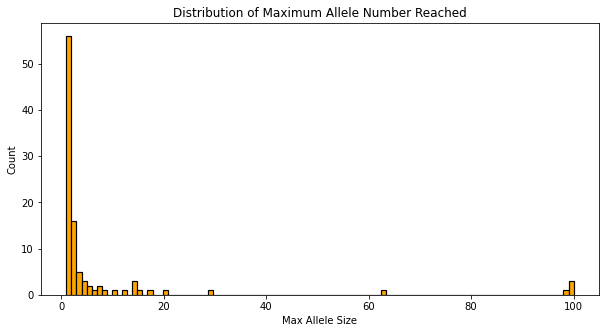

In [644]:
wf_simulator = WrightFisher(N = 100)
simulation_results = wf_simulator.repeatSimulate(allele_count = 1, n_times = 100)

wf_simulator.plotMaxAllele(simulation_results["max_allele_counts"])

#simulation_results

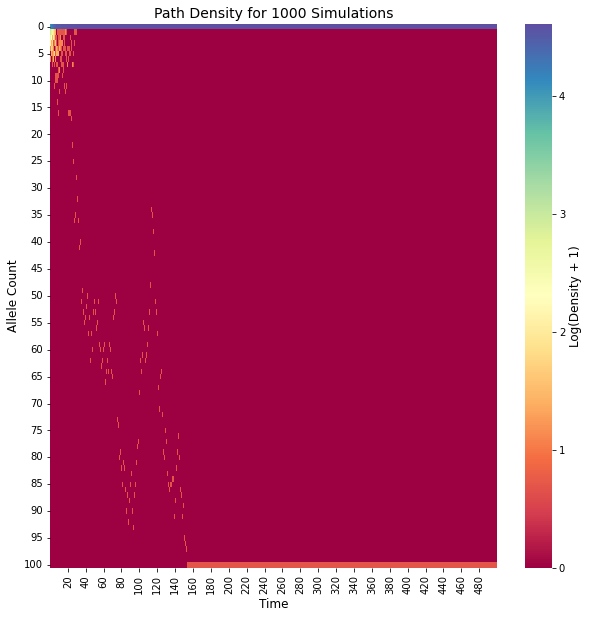

In [590]:
wf_simulator.plotPathDensity(simulation_results["path_density"], 
                             cmap = "Spectral",
                             title = "Path Density for 1000 Simulations")